In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart = pd.read_csv("../data/heart.csv")

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Noto che non ci sono valori mancanti

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

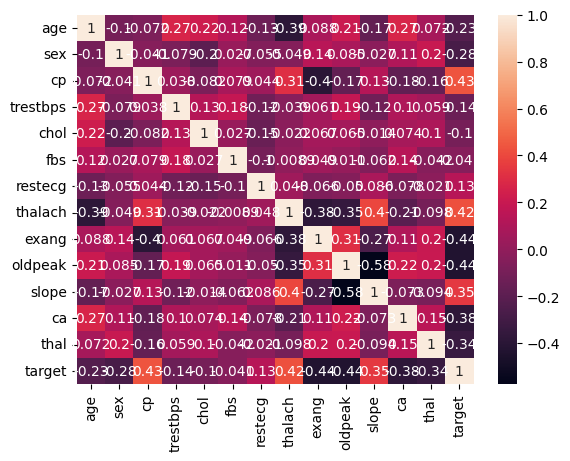

In [6]:
sns.heatmap(heart.corr(), annot=True)

Non ci sono particolare correlazioni tra le feature e il target

<Axes: xlabel='sex', ylabel='age'>

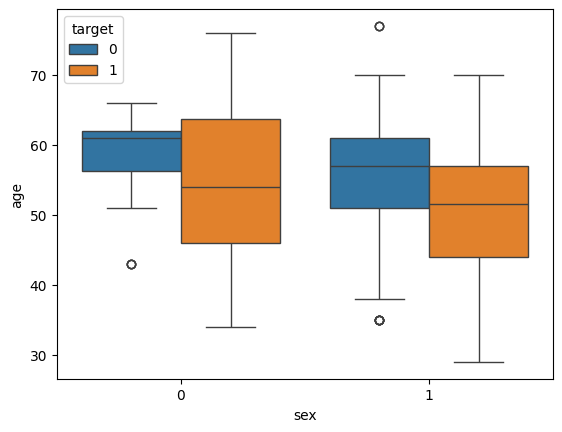

In [7]:
sns.boxplot(data=heart, x='sex', y='age', hue='target')

Noto che con l'avanzare della età è più probabile avere una heart disease. 

In [8]:
from sklearn.model_selection import train_test_split

X = heart.drop('target', axis=1)
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 1020 to 860
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       717 non-null    int64  
 1   sex       717 non-null    int64  
 2   cp        717 non-null    int64  
 3   trestbps  717 non-null    int64  
 4   chol      717 non-null    int64  
 5   fbs       717 non-null    int64  
 6   restecg   717 non-null    int64  
 7   thalach   717 non-null    int64  
 8   exang     717 non-null    int64  
 9   oldpeak   717 non-null    float64
 10  slope     717 non-null    int64  
 11  ca        717 non-null    int64  
 12  thal      717 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 78.4 KB


In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 527 to 861
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       308 non-null    int64  
 1   sex       308 non-null    int64  
 2   cp        308 non-null    int64  
 3   trestbps  308 non-null    int64  
 4   chol      308 non-null    int64  
 5   fbs       308 non-null    int64  
 6   restecg   308 non-null    int64  
 7   thalach   308 non-null    int64  
 8   exang     308 non-null    int64  
 9   oldpeak   308 non-null    float64
 10  slope     308 non-null    int64  
 11  ca        308 non-null    int64  
 12  thal      308 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.7 KB


In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[159   0]
 [  3 146]]


In [14]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)
score

0.9902597402597403